# <b>Loading libraries</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import warnings
import time

# <b>Loading dataset</b>

In [2]:
#I want to predict if password strenght is 0,1,2 given a various features 

#passwords=pd.read_csv (r"C:\Users\yuval\data.csv")#import DATASET to the notebook
#passwords
data = pd.read_csv(r"C:\Users\yuval\data.csv", error_bad_lines=False)
data

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


# <b>know and organize the dataset</b>

In [3]:
# check the shape of the DataFrame (rows, columns)
data.shape

(669640, 2)

In [4]:
#see how many values are in strength column
set(data["strength"].to_list())

{0, 1, 2}

**Explanation about the columns:**<br>

**What are the features?**<br>
password-object consists of numbers, english letters and special Characters. <br>

**What is the response?**<br>
strength-as we saw,and as it already wrote in Kaggle -three values(0 , 1 , 2)- 0 for weak, 1 for medium, 2 for strong.<br>

**What else do we know?**<br>
There are 669640  observations (represented by the rows)

In [5]:
#To get quick description of the data,particular about the total number of rows, 
#each attribute’s type, and the number of nonnull values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [6]:
#I want to check what the range of all strength column: 
data.describe()
#I can see that the range is like they wrote in kaggle-0-2, and the mean strength for all the column is 0.990196

,strength
count,669640.000000
mean,0.990196
std,0.507948
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


# <b>Duplicates values</b>

In [7]:
#if there are duplicate passwords-I want to delete it
data=data.drop_duplicates(subset=['password'],keep=False)#remove duplicates on specifics columns
data
#as we can see the number of rows still the same, so there are no duplicate values

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


# <b>Nan values</b>

In [8]:
#check for null values
print(data.isnull().sum())


password    1
strength    0
dtype: int64


In [9]:
#I will check the NaN value of the column password    
NaNPass=data[data['password'].isna()]
NaNPass

,password,strength
367579,NaN,0


In [10]:
#i have no need of this value, so I will delete this 
data.dropna(axis=0,inplace=True)
#I will check again to make sure   
NaNPass=data[data['password'].isna()]
NaNPass

,password,strength


In [11]:
#I deletes 1 row from the dataset because of case of Nan value, we will write it by precent:
print ("Percent of NaN values i deleted:", (1*100)/669640 ,"%")

Percent of NaN values i deleted: 0.00014933397049160743 %


In [12]:
#lets see how many password get any strength
data["strength"].value_counts()

1    496801
0     89701
2     83137
Name: strength, dtype: int64

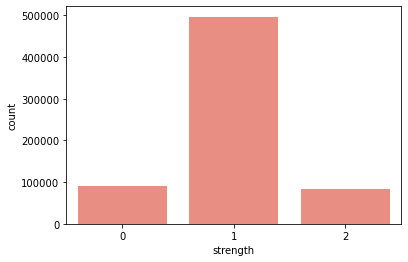

In [13]:
#now, lets see it by using a graph
sns.countplot(data["strength"],data=data,color="salmon")

**conclusion from the graph**<br>
most passwords have strength of 1, means medium strength.<br>

In [14]:
#I would like to create new column of pass_len represent the lenght of each password
#first of all, I will turn the type of column 'password' to string, so all the types will be the same, and also more comfortable to work with string.len()
data['password']=data['password'].astype(str)


In [15]:
#create the new colimn
data['pass_len']=data['password'].str.len()#in every cell put the length of the password
#also can be write as:
#data['pass_len']=data['password'].apply(lambda x: len(x))
data

,password,strength,pass_len
0,kzde5577,1,8
1,kino3434,1,8
2,visi7k1yr,1,9
3,megzy123,1,8
4,lamborghin1,1,11
...,...,...,...
669635,10redtux10,1,10
669636,infrared1,1,9
669637,184520socram,1,12
669638,marken22a,1,9


In [16]:
#see what values are in pass_len column (It is very long so i put it in comment)
#set(data["pass_len"].to_list())
#see how many password have certain lenght value(also very long so i put it in comment)
#data["pass_len"].value_counts()

In [17]:
#lets find max and min lenghts of the passwords
print ("The longest password length is:",data["pass_len"].max())
print ("The shortest password length is:",data["pass_len"].min())

#lets see what is the most common password length
print ("The most common password length is:",data["pass_len"].value_counts().idxmax(),"(" ,data["pass_len"].value_counts().max(),"passwords)" )

#now lets see the less common password length
dftemp=data.groupby(["pass_len"]).count()
dftemp#we can see that when it count 1, those are the less common passwords length
dft=dftemp.query('password == "1"')#we will extract from the df all passwords that count only one time 

print ("The less common passwords lengths are:",dft.index.to_list(), "(1 password for each length)")


The longest password length is: 220
The shortest password length is: 1
The most common password length is: 9 ( 144490 passwords)
The less common passwords lengths are: [33, 37, 39, 48, 64, 68, 100, 147, 185, 192, 220] (1 password for each length)


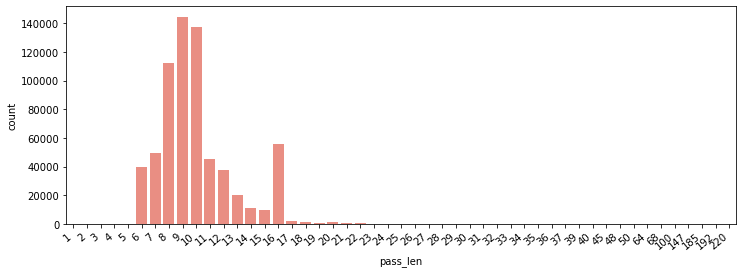

In [18]:
#lets show it in graph
plt.figure(figsize=(12,4)) # this creates a figure 12 inch wide, 4 inch high
gr=sns.countplot(data["pass_len"],data=data,color="salmon")#define my axis
gr.set_xticklabels(gr.get_xticklabels(), rotation=40, ha="right")#by this row i rotate the ticklabels
plt.show()

**Conclusion from the graph**<br>
Most passwords have lenght of 8,9,10<br>

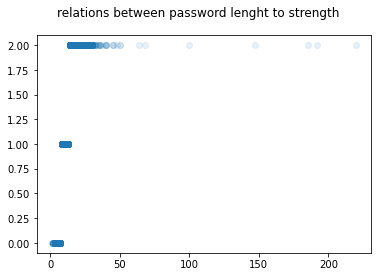

In [19]:
#now i would like to see what the relations between password lenght to It is strength

plt.suptitle('relations between password lenght to strength')
plt.scatter(data['pass_len'],data['strength'],alpha = 0.1)


**conclusion**<br>
All passwords with lenght bigger than 50 , have strong strength.

i would like to create new columns of:<br>
**'Num_Slett'**-represent the number of small letters in each password<br>
**'Num_Clett'**-represent the number of capital letters in each password<br>
**'Num_Space'**-represent the number of spaces in each password<br>
**'Num_dig'**-represent the number of digits in each password<br>
**'Num_Oth'**-represent the number of other signs in each password<br>


In [20]:
#create new column Num_dig represent the number of digits in each password
data ['Num_dig']= data['password'].apply(lambda x: len([str(x) for x in list(x) if str(x).isdigit()]))
#create new column Num_Space represent the number of spaces in each password
data ['Num_Space']= data['password'].apply(lambda x: len([str(x) for x in list(x) if str(x).isspace()]))
#create new column Num_Slett represent the number of small letters in each password
data ['Num_Slett']= data['password'].apply(lambda x: len([str(x) for x in list(x) if str(x).islower()]))
#create new column Num_Clett represent the number of capital letters in each password
data ['Num_Clett']= data['password'].apply(lambda x: len([str(x) for x in list(x) if str(x).isupper()]))
#create new column Num_Oth represent the number of other signs in each password
data ['Num_Oth']= data['pass_len']-data['Num_dig']-data['Num_Space']-data['Num_Slett']-data['Num_Clett']
data.tail(20)#present the last 20 rows in the df

,password,strength,pass_len,Num_dig,Num_Space,Num_Slett,Num_Clett,Num_Oth
669620,7598692aaa,1,10,7,0,3,0,0
669621,ain151090,1,9,6,0,3,0,0
669622,weslley.06888524,2,16,8,0,7,0,1
669623,nt7hm2p5w,1,9,3,0,6,0,0
669624,dxipqgtch507,1,12,3,0,9,0,0
669625,skate11223,1,10,5,0,5,0,0
669626,reeta456456,1,11,6,0,5,0,0
669627,sakaryal&#305;,2,14,3,0,8,0,3
669628,mario3391,1,9,4,0,5,0,0
669629,wen2cin2,1,8,2,0,6,0,0


## <b>Visualize Relations between columns<b><br>
    Let's visualize the relationship between the features and the response,
    means, visualize relationship between strength values to the columns below:<br>
    Num_dig, Num_Space, Num_Slett, Num_Clett, Num_Oth.

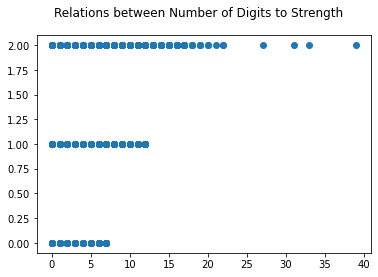

In [21]:
#plot Relations between Number of Digits to Strength
plt.suptitle('Relations between Number of Digits to Strength')
plt.scatter(data['Num_dig'],data['strength'])

**conclusion**<br>
All passwords with more than 15 digits, have strong (2) strength .

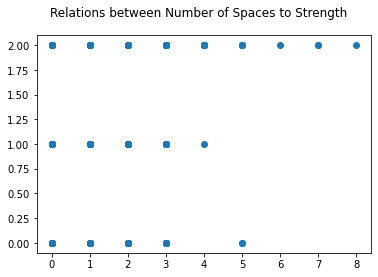

In [22]:
#plot Relations between Number of Spaces to Strength
plt.suptitle('Relations between Number of Spaces to Strength')
plt.scatter(data['Num_Space'],data['strength'])

**conclusion**<br>
All passwords with more than 5 spaces, have strong strength.

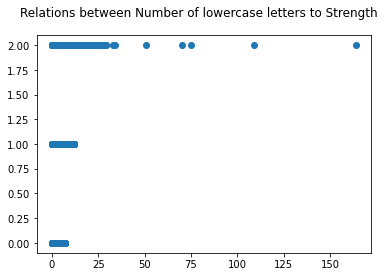

In [23]:
#plot Relations between Number of lowercase letters to Strength
plt.suptitle('Relations between Number of lowercase letters to Strength')
plt.scatter(data['Num_Slett'],data['strength'])

**conclusion**<br>
All passwords with more than 25 lowercase letters, have strong strength.

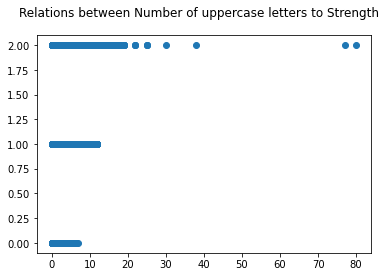

In [24]:
#plot Relations between Number of uppercase letters to Strength
plt.suptitle('Relations between Number of uppercase letters to Strength')
plt.scatter(data['Num_Clett'],data['strength'])

**conclusion**<br>
All passwords with more than 20 uppercase letters, have strong strength.

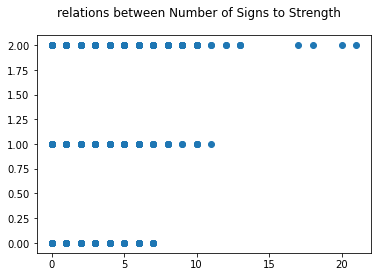

In [25]:
#plot Relations between Number of signs to Strength
plt.suptitle('relations between Number of Signs to Strength')
plt.scatter(data['Num_Oth'],data['strength'])

**conclusion**<br>
All passwords with more than 15 signs, have strong strength.

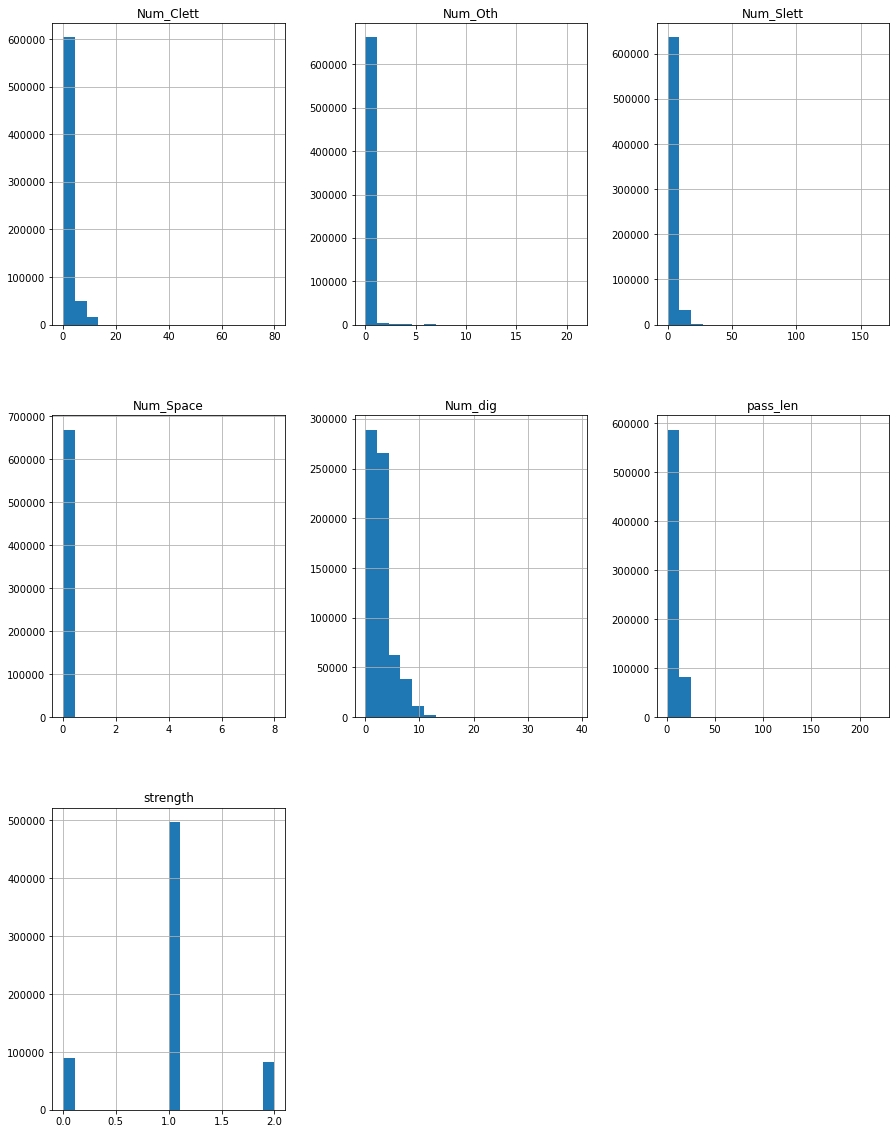

In [26]:
# Histogram of all numeric features
dfNoPass=data.drop('password',axis=1)#no need the 'password' column because we split every password into It is components
dfNoPass.hist(bins=18, figsize=(15,20))
plt.show()

**conclusions from the histograms:**<br>
1.Most passwords contain 0-20 uppercase letters.<br>
2.Most passwords contain 0-5 different signs (which are not letters/numbers/spaces).<br>
3.Most passwords contain 0-25 lowercase letters.<br>
4.Most passwords contain 0-10 digits.<br>
5.Most of the password have strength of 1 (alredy knew it from above code)<br>
6.Most of the passwords lenght are in the range 1-25.<br>
7.It is look like most of the password dont have spaces, but because It is graph we cant be sure, lets check it..<br>



In [27]:
#To be more specific abour conclusion #7:
space=dfNoPass.groupby(['Num_Space']).count()
print ("Most of the passwords have:", space['strength'].idxmax(),"spaces.")
print ("Fewest passwords have:", space['strength'].idxmin(),"spaces.")


Most of the passwords have: 0 spaces.
Fewest passwords have: 6 spaces.


In [28]:
data

,password,strength,pass_len,Num_dig,Num_Space,Num_Slett,Num_Clett,Num_Oth
0,kzde5577,1,8,4,0,4,0,0
1,kino3434,1,8,4,0,4,0,0
2,visi7k1yr,1,9,2,0,7,0,0
3,megzy123,1,8,3,0,5,0,0
4,lamborghin1,1,11,1,0,10,0,0
...,...,...,...,...,...,...,...,...
669635,10redtux10,1,10,4,0,6,0,0
669636,infrared1,1,9,1,0,8,0,0
669637,184520socram,1,12,6,0,6,0,0
669638,marken22a,1,9,2,0,7,0,0


In [29]:
#there is no need in password column because we split every password into It is components
#so i'll delete this column:
data.drop('password',axis=1,inplace=True)
data

,strength,pass_len,Num_dig,Num_Space,Num_Slett,Num_Clett,Num_Oth
0,1,8,4,0,4,0,0
1,1,8,4,0,4,0,0
2,1,9,2,0,7,0,0
3,1,8,3,0,5,0,0
4,1,11,1,0,10,0,0
...,...,...,...,...,...,...,...
669635,1,10,4,0,6,0,0
669636,1,9,1,0,8,0,0
669637,1,12,6,0,6,0,0
669638,1,9,2,0,7,0,0


In [30]:
#before we're getting started,let's check all types of each column, because we need all to be in float/int type because of sklearn
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669639 entries, 0 to 669639
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   strength   669639 non-null  int64
 1   pass_len   669639 non-null  int64
 2   Num_dig    669639 non-null  int64
 3   Num_Space  669639 non-null  int64
 4   Num_Slett  669639 non-null  int64
 5   Num_Clett  669639 non-null  int64
 6   Num_Oth    669639 non-null  int64
dtypes: int64(7)
memory usage: 60.9 MB


In [31]:
#we will compute standard correlation coefficient between every pair of attributes, using the corr() method:
Correlation=data.corr()
Correlation

,strength,pass_len,Num_dig,Num_Space,Num_Slett,Num_Clett,Num_Oth
strength,1.000000,0.836817,0.175469,0.011561,0.226102,0.620512,0.155976
pass_len,0.836817,1.000000,0.168565,0.029406,0.370498,0.667152,0.224570
Num_dig,0.175469,0.168565,1.000000,-0.006568,-0.566564,-0.081351,0.024763
Num_Space,0.011561,0.029406,-0.006568,1.000000,0.010864,0.000789,0.042795
Num_Slett,0.226102,0.370498,-0.566564,0.010864,1.000000,-0.102308,0.097523
Num_Clett,0.620512,0.667152,-0.081351,0.000789,-0.102308,1.000000,0.007073
Num_Oth,0.155976,0.224570,0.024763,0.042795,0.097523,0.007073,1.000000


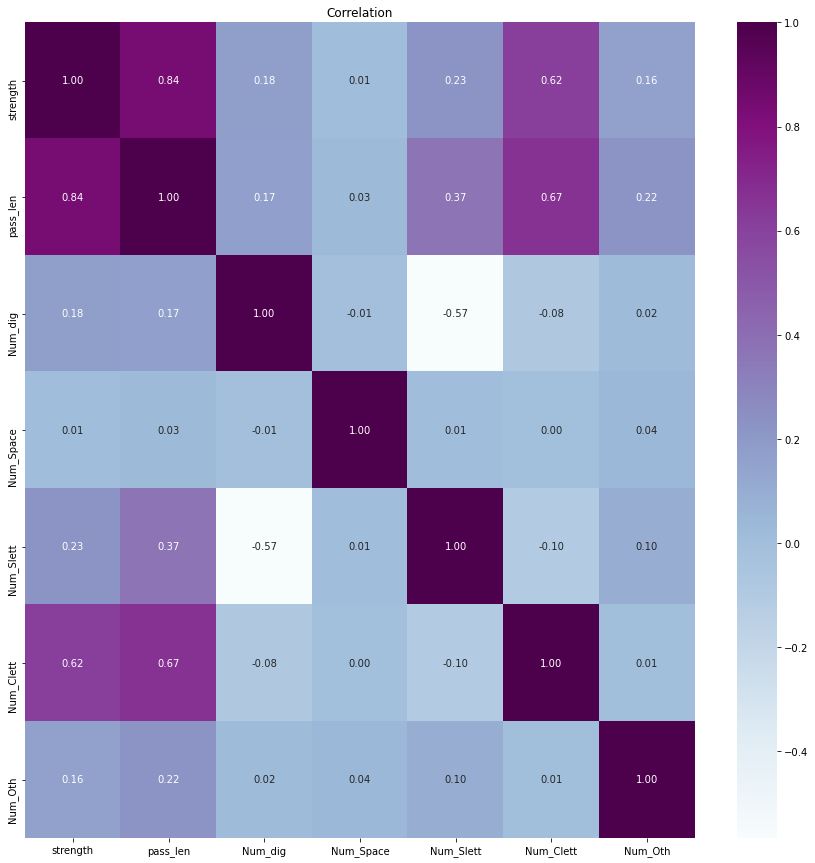

In [32]:
#show correlation as heat map
plt.figure(figsize=(15,15))#set size
sns.heatmap(Correlation, annot=True,cmap="BuPu", fmt=".2f")
plt.title ('Correlation')
plt.show()

**Conclusion**
we can see there is high correlation beteween Num_Clett,pass_len to strength,means their values increases in corralation.


# <b>split to train set and test set</b>

In [33]:
#split the data into labels and features 
y=data.strength #strength is the label we want to predict
x=data.drop('strength',axis=1)#use drop function to take all other data in x

In [34]:
#split the data to test set and train set 
from sklearn.model_selection import train_test_split #to perform the splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)#we will tale 30% of the dataset to testing and the rest for training
#by write random_state=42 we will get same data (same values) in train and test datasets every rime we ran this code.

In [35]:
first_train=x_train
first_test=x_test
check_train=y_train
check_test=y_test
#check the len of the sets:
print("the lenght of first_train is:",len(first_train))
print("the lenght of check_train is:",len(check_train))
print("the lenght of first_test is:",len(first_test))
print("the lenght of check_test is:",len(check_test))

the lenght of first_train is: 468747
the lenght of check_train is: 468747
the lenght of first_test is: 200892
the lenght of check_test is: 200892


# <b>KNN model</b>
## <b> Which n_neighbors should I choose?<b>

First of all I ran for loop about different n_neighbors and checked the accuracy for eack case, <br>
then I chose the n_neighbors that gave me the most acuurate value:<br>


In [36]:
from sklearn.neighbors import KNeighborsClassifier


In [37]:
#please dont run this cell,It is very long time to be loaded
#i ran it in the start to see which n neighbors will be the best to choose
scores=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)

#fit the model with data
    knn.fit(first_train,check_train)

# predict the response for new observations
    from sklearn.model_selection import cross_val_score #import cross validation method

    score=cross_val_score(knn,first_train,check_train,cv=2).mean()
    print("Accuracy for k="+str(i)+" is "+str(score) )
    scores.append(score)
    

Accuracy for k=1 is 0.9999743998361588
Accuracy for k=2 is 0.9999530663480865
Accuracy for k=3 is 0.9999615997542383
Accuracy for k=4 is 0.999940266266166
Accuracy for k=5 is 0.9999402662570636
Accuracy for k=6 is 0.999938132914628
Accuracy for k=7 is 0.9999338662388592
Accuracy for k=8 is 0.9999189328509124
Accuracy for k=9 is 0.9999210661751432
Accuracy for k=10 is 0.9999103994447606
Accuracy for k=11 is 0.9999103994447606
Accuracy for k=12 is 0.9999039993992491
Accuracy for k=13 is 0.9999039993992491
Accuracy for k=14 is 0.9998911992900215
Accuracy for k=15 is 0.999895465983995
Accuracy for k=16 is 0.9998890659384836
Accuracy for k=17 is 0.9998954659748926
Accuracy for k=18 is 0.999886932596048
Accuracy for k=19 is 0.9998890659384836


In [38]:
#this is the array of all the accuracies according to different n neighbors
scores

[0.9999743998361588,
 0.9999530663480865,
 0.9999615997542383,
 0.999940266266166,
 0.9999402662570636,
 0.999938132914628,
 0.9999338662388592,
 0.9999189328509124,
 0.9999210661751432,
 0.9999103994447606,
 0.9999103994447606,
 0.9999039993992491,
 0.9999039993992491,
 0.9998911992900215,
 0.999895465983995,
 0.9998890659384836,
 0.9998954659748926,
 0.999886932596048,
 0.9998890659384836]

Text(0, 0.5, 'Cross-Validation Testing Accuracy')

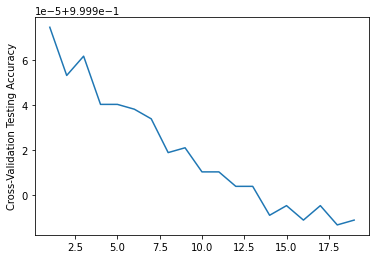

In [39]:
#lets plot the relation between n and testing accuracy
n_neigh=list(range(1,20))
plt.plot(n_neigh,scores)
plt.ylabel('Cross-Validation Testing Accuracy')#show the number of 0.9999X, means- 7,5,,6,4,4,3,3,1.....


**Conclusion**<br>
The most accurate n neighbors is n=1.

## Fit & Predict

In [40]:
knn = KNeighborsClassifier(n_neighbors=1)
#train the model
knn.fit(first_train,check_train)
#predict the values for first_test
Predictions=knn.predict(first_test)

In [41]:
from sklearn.metrics import accuracy_score
print("The accuracy for KNN model is:",accuracy_score(check_test,Predictions))

The accuracy for KNN model is: 0.9999701332059017


## Model evaluation metrics for classification


### Confusion Matrix

In [42]:
#compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(check_test,Predictions)
CM#It's a 3x3 matrix because there are 3 response classes (0,1,2)

array([[ 26903,      0,      0],
       [     3, 148952,      2],
       [     0,      1,  25031]], dtype=int64)

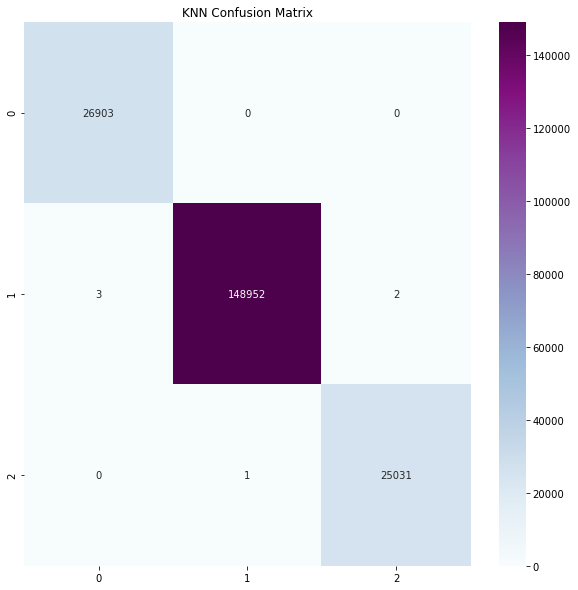

In [43]:
#show CM as heat map
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('KNN Confusion Matrix')
plt.show()

**Conclusion**<br>
There are a lot cases where the KNN model predict correctly, **but** there are also few cases where the model prediction is wrong. 

In [44]:
#now, let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method
from sklearn.metrics import classification_report
print (classification_report(check_test,Predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26903
           1       1.00      1.00      1.00    148957
           2       1.00      1.00      1.00     25032

    accuracy                           1.00    200892
   macro avg       1.00      1.00      1.00    200892
weighted avg       1.00      1.00      1.00    200892



**Accuracy,Classification Error (Misclassification Rate) :** Overall, how often is the classifier incorrect?<br>


In [45]:
#we'll also check the accuracy by accuracy_score and we can see It is almost the same as R2
from sklearn import metrics
accur=metrics.accuracy_score(check_test, Predictions)
print("The Accuracy of this model is:",accur)
print("the Classification Error for this model is:", 1 - accur)

The Accuracy of this model is: 0.9999701332059017
the Classification Error for this model is: 2.986679409833215e-05


## <b>Choosing Dummy Classifier</b><br>
In our class we learned about 4 different kinds of dummy classifiers-<br>
1. most_frequent-**always** predicts the most frequent label in the training set.<br>
2. stratified-generates predictions by respecting the **training set’s class distribution**.<br>
3. uniform-generates predictions uniformly at **random**.<br>
4. constant-always predicts a label that **we provide him**.<br>
**How will we going to choose the right dummy classifier?**<br>
We will check the accuracy of each dummy classifier and choose the most accurate one.<br>


In [46]:
#most_frequent dummy classifier:
from sklearn.dummy import DummyClassifier

#Start measuring running time
StartTimeDummy = time.time()

dcM=DummyClassifier(strategy="most_frequent",random_state=42)
dcM.fit(first_train,check_train)
PredictionsM=dcM.predict(first_test)

#Finish measuring running time
EndTimeDummy = time.time()

#Toal running time
TotalTimeDummy= EndTimeDummy - StartTimeDummy

print("The accuracy of the most_frequent dummy classifier prediction is:",metrics.accuracy_score(check_test,PredictionsM))


The accuracy of the most_frequent dummy classifier prediction is: 0.7414780080839456


In [47]:
#stratified dummy classifier:
dcS=DummyClassifier(strategy="stratified",random_state=42)
dcS.fit(first_train,check_train)
PredictionsS=dcS.predict(first_test)

print("The accuracy of the stratified dummy classifier prediction is:",metrics.accuracy_score(check_test,PredictionsS))



The accuracy of the stratified dummy classifier prediction is: 0.5831790215638253


In [48]:
#uniform dummy classifier:
dcU=DummyClassifier(strategy="uniform",random_state=42)
dcU.fit(first_train,check_train)
PredictionsU=dcU.predict(first_test)

print("The accuracy of the uniform dummy classifier prediction is:",metrics.accuracy_score(check_test,PredictionsU))


The accuracy of the uniform dummy classifier prediction is: 0.3329649762061207


In [49]:
#constant dummy classifier:
dcC=DummyClassifier(strategy="constant",random_state=42, constant=1)#why 1? because we saw that most of the password have this strenght value
dcC.fit(first_train,check_train)
PredictionsC=dcC.predict(first_test)

print("The accuracy of the constant dummy classifier prediction is:",metrics.accuracy_score(check_test,PredictionsC))


The accuracy of the constant dummy classifier prediction is: 0.7414780080839456


As we can see, the accuracy score of both constant dummy classifier and most_frequent dummy classifier is the same,<br>
so we will take the most_frequent dummy classifier. <br>
Next level we'll create ROC (receiver operating characteristic curve) for each model-KNN and the dummy one,<br>
and also compute the AUROC.<br>by that we will get better interpretation about our model and it ability to predict.<br>
We need to get AUROC bigger than the AUROC of the Dummy Classifier, why? because than we know our model's False Positive Rate<br>
is smaller than the FPR off the Dummy Classifier.

## <b>ROC curves and AUC ROC </b><br>
### <b> AUC ROC<b>

In [50]:
#to get the auc roc roc curves we will use Scikit-Learn’s roc_curve, roc_auc_score functions:
from sklearn.metrics import roc_curve, roc_auc_score

Pred_knn_prob=knn.predict_proba(first_test)#here it will show me the probability to choose each label of every password i test-in knn model
Pred_dum_prob=dcM.predict_proba(first_test)#here it will show me the probability to choose each label of every password i test-in Dummy model
auc_knn=roc_auc_score(check_test,Pred_knn_prob,multi_class="ovr")#why to add the multi_class?the defoult value of multiclass is raise which raises an error,so we need to change it to ovr\ovo
auc_dum=roc_auc_score(check_test,Pred_dum_prob,multi_class="ovr")


print ("The AUC ROC of the dummy model is:",auc_dum)
print ("The AUC ROC of the knn model is:",auc_knn)

The AUC ROC of the dummy model is: 0.5
The AUC ROC of the knn model is: 0.9999797690684297


**Conclusion**<br>
The ares of KNN model is bigger than area of Dummy model,therefore the False Positieve Rate in KNN model is smaller-<br>
so we can concluse the model id better.

### <b> ROC curve<b>

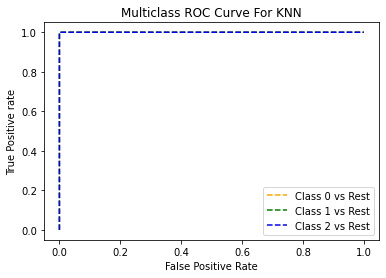

In [51]:
#for KNN
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 3
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(check_test, Pred_knn_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')#because I have 3 classes to predict, I need to check each class with the rest of the classes
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')#therefore, I have 3 classes, but appear only one graph, because they are on each other. 
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC Curve For KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

Although it seems almost perfect, as we saw by the Confusion Matrix , and the AUC- there are few mistakes and the model is not perfect!<br>

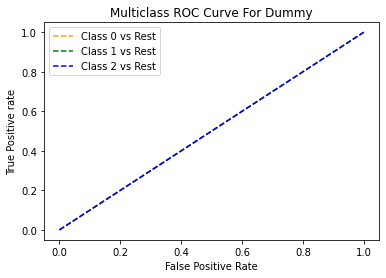

In [52]:
#for Dummy
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 3
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(check_test, Pred_dum_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC Curve For Dummy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

As you can see, the results absolutely reflect what we found when we computed the AUC ROC, and it is clearly to see the difference between the Dummy model and the KNN model. 

# <b>Better Evaluation Using Cross-Validation</b>

In [53]:
from sklearn.model_selection import cross_val_score #import cross validation method
#most of the time the recommadation is to choose cv=10, let's check it
scores=[]
for i in range(2,20): 
    score=cross_val_score(knn,first_train,check_train,cv=i).mean()
    print("Accuracy for cv="+str(i)+" is "+str(score) )
    scores.append(score)

Accuracy for cv=2 is 0.9999743998361588
Accuracy for cv=3 is 0.9999701331421855
Accuracy for cv=4 is 0.9999743997997491
Accuracy for cv=5 is 0.9999679997269304
Accuracy for cv=6 is 0.9999765330602631
Accuracy for cv=7 is 0.9999807998225042
Accuracy for cv=8 is 0.9999765331057745
Accuracy for cv=9 is 0.9999786665301325
Accuracy for cv=10 is 0.9999743997724394
Accuracy for cv=11 is 0.99997653313308
Accuracy for cv=12 is 0.9999807998634637
Accuracy for cv=13 is 0.9999807997496829
Accuracy for cv=14 is 0.9999765331694904
Accuracy for cv=15 is 0.9999701329919889
Accuracy for cv=16 is 0.9999765329965394
Accuracy for cv=17 is 0.999978666566535
Accuracy for cv=18 is 0.9999743995903864
Accuracy for cv=19 is 0.9999765331103209


In [54]:
scores

[0.9999743998361588,
 0.9999701331421855,
 0.9999743997997491,
 0.9999679997269304,
 0.9999765330602631,
 0.9999807998225042,
 0.9999765331057745,
 0.9999786665301325,
 0.9999743997724394,
 0.99997653313308,
 0.9999807998634637,
 0.9999807997496829,
 0.9999765331694904,
 0.9999701329919889,
 0.9999765329965394,
 0.999978666566535,
 0.9999743995903864,
 0.9999765331103209]

In [55]:
max_num=max(scores) #find the max number from the list
max_index = scores.index(max_num) #for the max number , find It is index

print("The CV will give us the best Cross Validation Score is: CV =",max_index+2 ) #increase by 2 because we started when CV=2.
print("The cross validation score of this model is:", max_num)

The CV will give us the best Cross Validation Score is: CV = 12
The cross validation score of this model is: 0.9999807998634637


Text(0, 0.5, 'Cross-Validation Testing Accuracy')

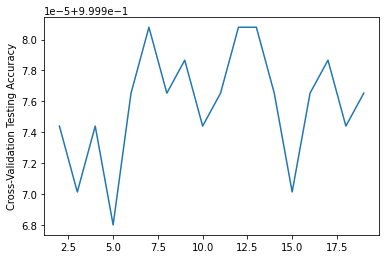

In [56]:
#lets plot the relation between cv and testing accuracy
cv=list(range(2,20))
plt.plot(cv,scores)
plt.ylabel('Cross-Validation Testing Accuracy')#show the number of 0.9999XX, means- 74,70,74,67,76.....
#as we compute, the best CV is when CV=12

# <b>Second model:Logistic Regression</b>
## Fit & Predict

In [57]:
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

#Start measuring running time ########addition from semester B
StartTimeLR = time.time()

# instantiate the model (using the default parameters)
log_reg = LogisticRegression(max_iter=400)

# fit the model with data
log_reg.fit(first_train,check_train)

#make predictions on the testing set
predictionLog = log_reg.predict(first_test)

#Finish measuring running time  ########addition from semester B
EndTimeLR = time.time()

#Toal running time  ########addition from semester B
TotalTimeLR = EndTimeLR - StartTimeLR



## Confusion Matrix

In [58]:
#compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:
from sklearn.metrics import confusion_matrix
CMLog=confusion_matrix(check_test,predictionLog)
CMLog#It's a 3x3 matrix because there are 3 response classes (0,1,2)

array([[ 26903,      0,      0],
       [     0, 148957,      0],
       [     0,      0,  25032]], dtype=int64)

**conclusion**<br>
According to the Confusion Matrix, in Logistic Regression we have more cases the model prediction were correct than KNN model.<br>
Also, according to the heat map below, we can see the predict here is better than KNN's predict by the appearing of more 'cold' colors (blue, black)<br> than 'hot' colors (red,brown).

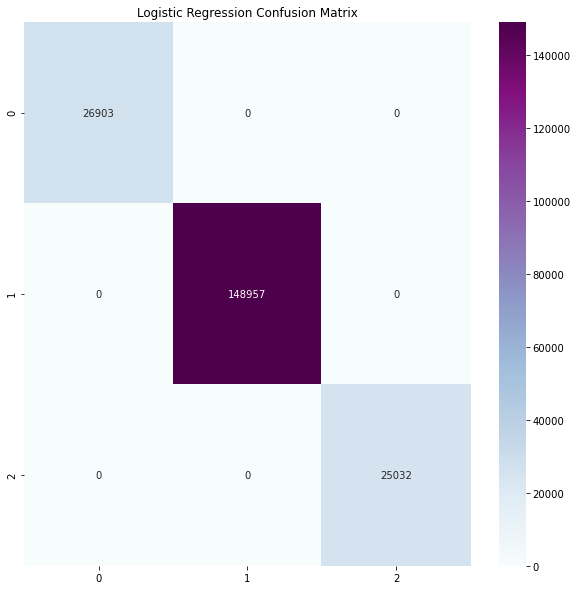

In [59]:
#show CM as heat map
plt.figure(figsize=(10,10))#set size
sns.heatmap(CMLog,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Logistic Regression Confusion Matrix')
plt.show()

**Conclusion**<br>
The Logistic Regression model is better than the KNN model, because as we can see there are more errors in prediction in the Confusion Matrix of the KNN than the Logistic Regression.
The main left diagonal represent all the cases that the model predict correctly (TN,TP), <br>
the rest cells represent all the cases cases the model predict incorrectly (FP,FN).

In [60]:
#now, let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method
from sklearn.metrics import classification_report
print (classification_report(check_test,predictionLog))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26903
           1       1.00      1.00      1.00    148957
           2       1.00      1.00      1.00     25032

    accuracy                           1.00    200892
   macro avg       1.00      1.00      1.00    200892
weighted avg       1.00      1.00      1.00    200892



**Accuracy,Classification Error (Misclassification Rate) :** Overall, how often is the classifier incorrect?<br>


In [61]:
#we'll also check the accuracy by accuracy_score 
accurlog=metrics.accuracy_score(check_test, predictionLog)
print("The Accuracy of this model is:",accurlog)
print("the Classification Error for this model is:", 1 - accurlog)

The Accuracy of this model is: 1.0
the Classification Error for this model is: 0.0


**Conclusion**<br>
The Accuracy in Logistic Regression is better than the Accuracy in KNN model,<br>
therefore, also the Classification Error is smaller.

## Choosing Dummy Classifier
Same way as we alrady explained before, we will choose the best Dummy Classifier and compare it to our model.
The best Dummy Classifier as we already compute is the most_frequent Dummy Classifier, with Accuracy of $0.7414780080839456$.<br>
Next level we'll create ROC (receiver operating characteristic curve) for each model-KNN and the dummy one,<br>
and also compute the AUROC.<br>by that we will get better interpretation about our model and it ability to predict. 


## <b>ROC curves and AUC ROC </b><br>
### <b> AUC ROC<b>

In [62]:
#to get the auc roc roc curves we will use Scikit-Learn’s roc_curve, roc_auc_score functions:
from sklearn.metrics import roc_curve, roc_auc_score

#now because we use multiclass, we need to change the values of predictions -this must be probability estimates which sum to 1. 
Pred_log_prob=log_reg.predict_proba(first_test)
Pred_dum_prob=dcM.predict_proba(first_test)
auc_dum=roc_auc_score(check_test,Pred_dum_prob,multi_class="ovr")
auc_log=roc_auc_score(check_test,Pred_log_prob,multi_class="ovr")
print ("The AUC ROC of the Logistic Regression model is:",auc_log)
print ("The AUC ROC of the Dummy model is:",auc_dum)
print ("The AUC ROC of the KNN model is:",auc_knn)

The AUC ROC of the Logistic Regression model is: 1.0
The AUC ROC of the Dummy model is: 0.5
The AUC ROC of the KNN model is: 0.9999797690684297


**Conclusion**<br>
We can see that the area of the Logistic Regression model is bigger than the Dummy model, and even 'perfect'-<br>
because we have no FPR (False Positieve Rate)

### <b> ROC curve<b>

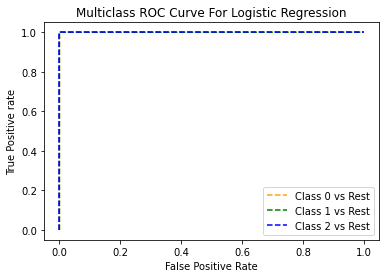

In [63]:
#for Logistic Regression
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 3
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(check_test, Pred_log_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC Curve For Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

Also in this model, it can be seen from the graph that the AUC of the Logistic Regression is bigger than the Dummy model(as we showed above) .

# <b>Better Evaluation Using Cross-Validation</b>

In [64]:
#most of the time the recommadation is to choose cv=10, let's check it
scores=[]
for i in range(2,20): 
    score=cross_val_score(log_reg,first_train,check_train,cv=i).mean()
    print("Accuracy for cv=",i," is ",score )
    scores.append(score)

Accuracy for cv= 2  is  0.9999957332969241
Accuracy for cv= 3  is  0.9999957333060264
Accuracy for cv= 4  is  0.9999957332787193
Accuracy for cv= 5  is  1.0


C:\Users\yuval\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for cv= 6  is  0.9999978666393597


C:\Users\yuval\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for cv= 7  is  1.0
Accuracy for cv= 8  is  0.9999978666393596
Accuracy for cv= 9  is  0.9999978666530132
Accuracy for cv= 10  is  0.9999978666211545


C:\Users\yuval\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for cv= 11  is  0.9999978666348084
Accuracy for cv= 12  is  0.9999978666393597


C:\Users\yuval\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yuval\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy for cv= 13  is  0.9999978666257058
Accuracy for cv= 14  is  0.9999978666575645
Accuracy for cv= 15  is  0.9999978665983977
Accuracy for cv= 16  is  0.9999978666029492


C:\Users\yuval\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for cv= 17  is  0.9999978666257059


C:\Users\yuval\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for cv= 18  is  0.9999978666120519
Accuracy for cv= 19  is  0.9999978666621154


In [65]:
scores

[0.9999957332969241,
 0.9999957333060264,
 0.9999957332787193,
 1.0,
 0.9999978666393597,
 1.0,
 0.9999978666393596,
 0.9999978666530132,
 0.9999978666211545,
 0.9999978666348084,
 0.9999978666393597,
 0.9999978666257058,
 0.9999978666575645,
 0.9999978665983977,
 0.9999978666029492,
 0.9999978666257059,
 0.9999978666120519,
 0.9999978666621154]

In [66]:
max_num=max(scores) #find the max number from the list
max_index = scores.index(max_num) #for the max number , find It is index

print("The CV will give us the best Cross Validation Score is: CV =",max_index+2 ) #increase by 2 because we started when CV=2.
print("The cross validation score of this model is:", max_num)

The CV will give us the best Cross Validation Score is: CV = 5
The cross validation score of this model is: 1.0


Text(0, 0.5, 'Cross-Validation Testing Accuracy')

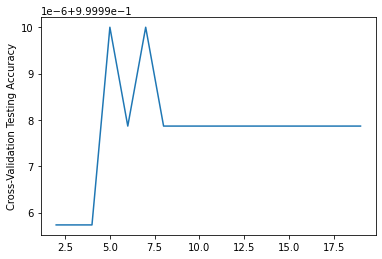

In [67]:
#lets plot the relation between cv and testing accuracy
cv=list(range(2,20))
plt.plot(cv,scores)
plt.ylabel('Cross-Validation Testing Accuracy')#show the number of 0.9999XX, means- 74,70,74,67,76.....
#as we compute, the best CV is when CV=9

# <b>Final Accuracy Visualization </b>

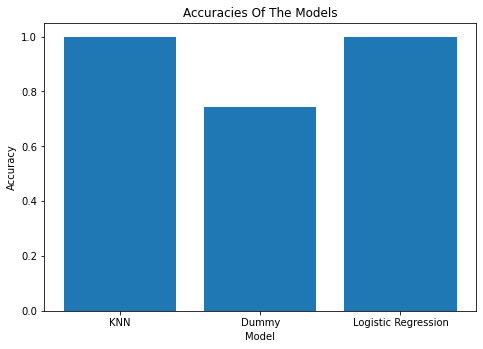

In [68]:
DumAc=metrics.accuracy_score(check_test,PredictionsM)
KnnAc=metrics.accuracy_score(check_test,Predictions)
LogAC=accurlog
figure=plt.figure()
Accu=[KnnAc,DumAc,LogAC]
axes=figure.add_axes([0,0,1,1])#determine the size of the figure- (0,0) is the lower left point of the new axes in figure coodinates,1 It is width and 1 height 
axes.bar(['KNN','Dummy','Logistic Regression'],Accu)

plt.title('Accuracies Of The Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

**Conclusion**<br>
As we can see (and as we already compute), the Logistic Regression and the KNN model have very close accuracy score values,<br> but as we already wrote before, the Logistic Regression model is better than the KNN model.

***************************************************************************************************************************

***************************************************************************************************************************

# <b>Continuing from last semester<b>

As you can see, the best accuracy i got from previous project, was: 0.9999807998634637, by using Logistic Regression model.<br>
In this part of the project I will show how can I get better accuracy while using all the methods we learned this semester.<br>


# <b> Ensemble Learning<b>
Building a model on top of many other models is called Ensemble Learning.<br>
More extensively, if you aggregate the predictions of a group of predictors (such as classifiers in current project), you will
often get better predictions than with the best individual predictor.<br>
In this part of the project I will try to improve my previous project results by using Ensemble Learning. <br>
    
While finding the model with the best accuracy, I would like to check which model has the best runtime.<br>


In [69]:
#Therefore , to find the best run time, I need to import the time library.
import time

#Initialize an empty array of model's running times
RunningTimes=[]

#Initialize an empty array of model's names
ModelName=[]

First of all, I will show the model 'Random Forests'.<br>

# <b> Random Forests<b>
    
Random Forest is the Ensemble Learning of Decision Trees.<br>                                                             Random Forests as we learned, is a supervised learning algorithm.<br>                                                           There is a direct relationship between the number of trees in the forest and the results it can get. It uses a number of decision trees and predicts the more accurate result by voting in case of classification (or averaging in case of regression). 


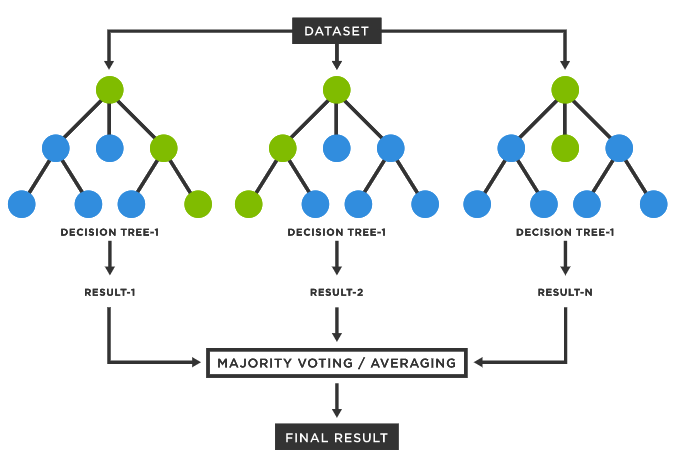

         
## Explanation about method's parameters<b>
**n_estimators** -  The number of trees in the forest,the more estimators you give it, the better it will do.<br>
From what I have been reading, 500 or 1000 is usually sufficient.<br>
**n_jobs** -  the number of CPU cores to use for training and predictions (–1 tells Scikit-Learn to use all available cores).<br>
**random_state**- is be used to set the internal parameters initially, so you can repeat the training deterministically.<br>
**max_depth**-Maximum number of levels in tree<br>
**min_samples_split**-Minimum number of samples required to split a node<br>
**min_samples_leaf**-Minimum number of samples required at each leaf node<br>

## Importing additional libraries

In [70]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

## Fit & Predict


In [71]:
#Start measuring running time
StartTimeRF = time.time()

# instantiate the model
RForest= RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=0)

# fit the model with data
RForest.fit(first_train, check_train)

#make predictions on the testing set (predict for first_test)
RForestPred = RForest.predict(first_test)

#Finish measuring running time
EndTimeRF = time.time()

#Total running time
TotalTimeRF= EndTimeRF - StartTimeRF

#Add model's running time to RunningTimes array, and name to ModelName array
RunningTimes.append(TotalTimeRF)
ModelName.append('RF')

**Accuracy,Classification Error (Misclassification Rate) :** Overall, how often is the classifier incorrect?<br>



In [72]:
accuracyRForest = metrics.accuracy_score(check_test, RForestPred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyRForest)
print("the Classification Error for this model is:", 1 - accuracyRForest)

The Accuracy of this model is: 1.0
the Classification Error for this model is: 0.0


## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the Random Forest classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [73]:
CM_RF=confusion_matrix(check_test,RForestPred)
CM_RF#It's a 3x3 matrix because there are 3 response classes (0,1,2)

array([[ 26903,      0,      0],
       [     0, 148957,      0],
       [     0,      0,  25032]], dtype=int64)

**Conclusion**<br>
According to the Confusion Matrix, in Random Forest all cases the model prediced were correct.<br>


Lets show Confusion Matrix as heat map:

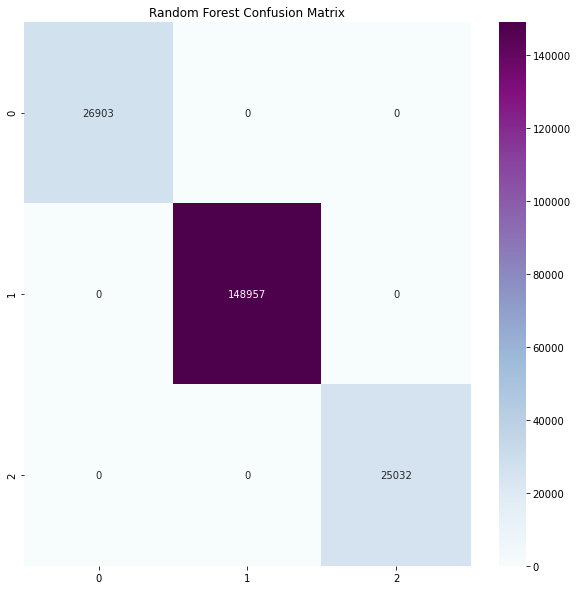

In [74]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_RF,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Random Forest Confusion Matrix')
plt.show()

**Conclusion**<br>
The main left diagonal represent all the cases that the model predict correctly (TN,TP), <br>
the rest cells represent all the cases the model predict incorrectly (FP,FN).<br>
As we can see the model predicted correctly all values .


### Classification Report

Let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method:

In [75]:
print (classification_report(check_test,RForestPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26903
           1       1.00      1.00      1.00    148957
           2       1.00      1.00      1.00     25032

    accuracy                           1.00    200892
   macro avg       1.00      1.00      1.00    200892
weighted avg       1.00      1.00      1.00    200892



**Conclusion**<br>

As we saw below in the confusion matrix, the FP is equal to 0,<br>
As we learned, **Precision** answer the question- What proportion of positive identifications was actually correct,<br>
and equal to:<br>
    $Precision=\frac {TP }{TP+FP}$ <br>
Therefore, because the FP is equal to 0, we get:<br>
    $Precision=\frac {TP }{TP}=1$ <br>
    
**Recall**, answer the question- What proportion of actual positives was identified correctly,<br>
and equal to:<br>
 $Recall=\frac {TP }{TP+FN}$ <br>
Therefore, because the FN is equal to 0, we get:<br>
    $Recall=\frac {TP }{TP}=1$ <br>
    
**F1 score** is defined as the harmonic mean between precision and recall, and It formula is:<br>
    $F1 score=2 \times \frac{Precision \times Recall}{Precision+ Recall}=\frac {2 }{2}=1$
   

# Boosting

Boosting refers to a family of algorithms that are able to convert weak learners to strong learners.<br>
The predictions are then combined through a weighted majority vote in case of classification (or a weighted sum in case of regression) to produce the final prediction.<br>
The models I will show are: AdaBoost, Gradient Boosting (XGBoost).

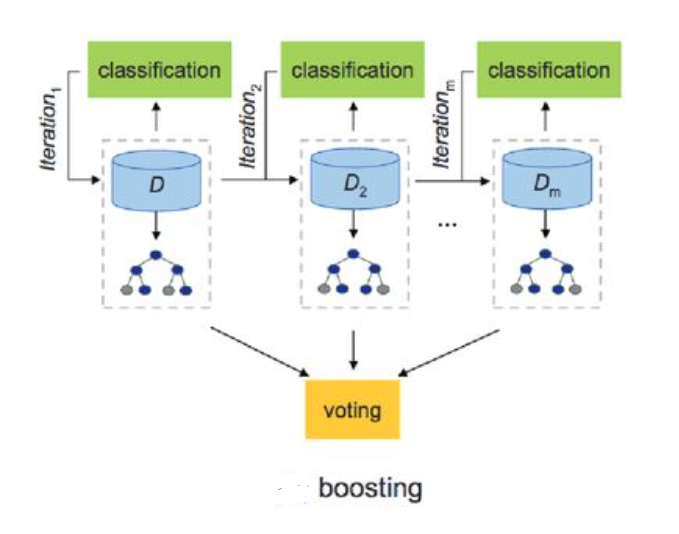

# <b> AdaBoost <b>
    
AdaBoost is the seconed model I will train.<br>
This model gives more attention to the training instances that the predecessor underfitted.<br>
This results in new predictors focusing more and more on the hard cases.

## Explain about method's parameters<b>
**n_estimators**- Number of weak learners to train iteratively.<br>
**learning_rate**- Shrinks the contribution of each classifier. It uses 1 as a default value.<br>
    There is a trade-off between n_estimators to learning_rate. 

## Importing additional libraries

In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


## Fit & Predict


In [77]:
#Start measuring running time
StartTimeADA = time.time()

# instantiate the model
DecisionTreeClf = DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(DecisionTreeClf, n_estimators=200, learning_rate=0.5)

# fit the model with data
ada_clf.fit(first_train, check_train)

#make predictions on the testing set (predict for first_test)
ada_clfPred = ada_clf.predict(first_test)

#Finish measuring running time
EndTimeADA = time.time()

#Toal running time
TotalTimeADA = EndTimeADA - StartTimeADA

#Add model's running time to RunningTimes array, and name to ModelName array
RunningTimes.append(TotalTimeADA)
ModelName.append('ADA')

**Accuracy,Classification Error (Misclassification Rate) :**


In [78]:
accuracyAda = metrics.accuracy_score(check_test, ada_clfPred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyAda)
print("the Classification Error for this model is:", 1 - accuracyAda)

The Accuracy of this model is: 1.0
the Classification Error for this model is: 0.0


## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the ADA Boost classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [79]:
CM_ADA=confusion_matrix(check_test,ada_clfPred)
CM_ADA#It's a 3x3 matrix because there are 3 response classes (0,1,2)

array([[ 26903,      0,      0],
       [     0, 148957,      0],
       [     0,      0,  25032]], dtype=int64)

**Conclusion**<br>
According to the Confusion Matrix, in Ada Boost all cases the model prediced were correct.<br>


Lets show Confusion Matrix as heat map:

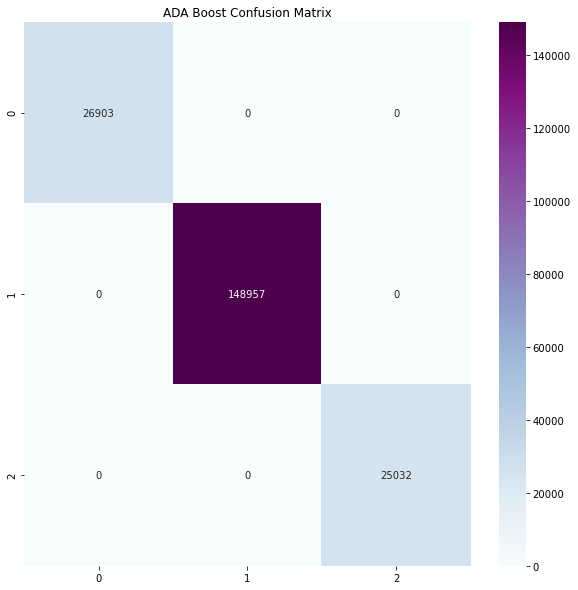

In [80]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_ADA,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('ADA Boost Confusion Matrix')
plt.show()

### Classification Report

Let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method, while:<br>
**Precision** answer the question- What proportion of positive identifications was actually correct,<br>
and equal to:<br>
    $Precision=\frac {TP }{TP+FP}$ <br>
    
**Recall**, answer the question- What proportion of actual positives was identified correctly,<br>
and equal to:<br>
 $Recall=\frac {TP }{TP+FN}$ <br>
 
**F1 score** is defined as the harmonic mean between precision and recall, and It formula is:<br>
$F1 score=2 \times \frac{Precision \times Recall}{Precision+ Recall}$

In [81]:
print (classification_report(check_test,ada_clfPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26903
           1       1.00      1.00      1.00    148957
           2       1.00      1.00      1.00     25032

    accuracy                           1.00    200892
   macro avg       1.00      1.00      1.00    200892
weighted avg       1.00      1.00      1.00    200892



**Conclusion**<br>

As we saw below in the confusion matrix, the FP is equal to 0,<br>
 **Precision** equal to:<br>
    $Precision=\frac {TP }{TP+FP}$ <br>
Therefore, because the FP is equal to 0, we get:<br>
    $Precision=\frac {TP }{TP}=1$ <br>
    
**Recall** equal to:<br>
 $Recall=\frac {TP }{TP+FN}$ <br>
Therefore, because the FN is equal to 0, we get:<br>
    $Recall=\frac {TP }{TP}=1$ <br>
    
**F1 score** equal to:<br>
    $F1 score=2 \times \frac{Precision \times Recall}{Precision+ Recall}=\frac {2 }{2}=1$
   

# Gradient Boosting

Just like AdaBoost,Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor.<br>
However, instead of tweaking the instance weights at every iteration like AdaBoost does, <br>
this method tries to fit the new predictor to the residual errors made by the previous predictor.


# <b> XGBoost  <b>
    
XGBoost is the third model I will train.<br>
XGBoost is an optimized implementation of Gradient Boosting , which stands for Extreme Gradient Boosting.<br>
This model have enhanced performance and speed in tree-based (sequential decision trees) machine learning algorithms.<br>
It is the most common algorithm used for applied machine learning in competitions and has gained popularity through winning solutions in structured and tabular data

## Explain about method's parameters<b>

**learning_rate**- Shrinks the contribution of each classifier. It uses 1 as a default value.<br>
There is a trade-off between n_estimators to learning_rate.<br>
**n_estimators**- Number of weak learners to train iteratively.<br>
**verbosity**- Verbosity of printing messages. Valid values of 0 (silent), 1 (warning), 2 (info), and 3 (debug).<br>
**use_label_encoder**-  Use the label encoder from scikit-learn to encode the labels. <br>
For new code, It is recommend to set this parameter to False.


## Importing additional libraries

In [82]:
import xgboost as xgb
from xgboost import XGBClassifier
import warnings

## Fit & Predict


In [83]:
#Start measuring running time
StartTimeXG = time.time()

# instantiate the model
XGBoost = XGBClassifier(learning_rate = 0.2, n_estimators = 200, verbosity=0,use_label_encoder=False)

# fit the model with data
XGBoost.fit(first_train, check_train)

#make predictions on the testing set (predict for first_test)
XGBoost_Pred = XGBoost.predict(first_test)

#Finish measuring running time
EndTimeXG = time.time()

#Toal running time
TotalTimeXG = EndTimeXG - StartTimeXG

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeXG)
ModelName.append('XG')

**Accuracy,Classification Error (Misclassification Rate) :**


In [84]:
accuracyXG = metrics.accuracy_score(check_test, XGBoost_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyXG)
print("the Classification Error for this model is:", 1 - accuracyXG)

The Accuracy of this model is: 1.0
the Classification Error for this model is: 0.0


## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the XG Boost classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [85]:
CM_XG=confusion_matrix(check_test,XGBoost_Pred)
CM_XG#It's a 3x3 matrix because there are 3 response classes (0,1,2)

array([[ 26903,      0,      0],
       [     0, 148957,      0],
       [     0,      0,  25032]], dtype=int64)

Lets show Confusion Matrix as heat map:

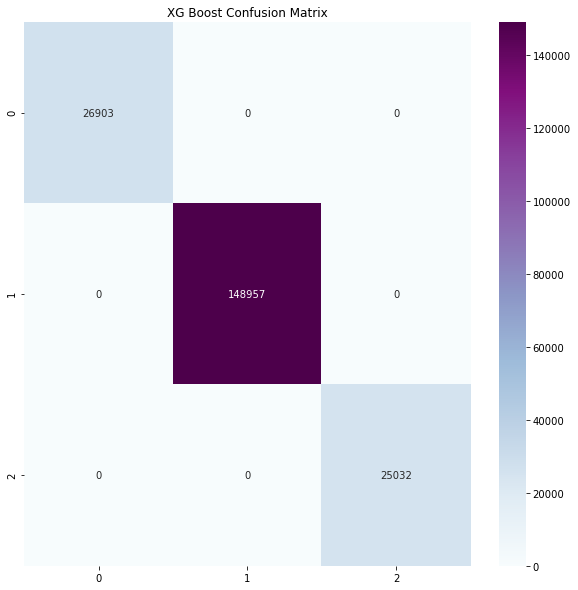

In [86]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_XG,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('XG Boost Confusion Matrix')
plt.show()

### Classification Report

Let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method:

In [87]:
print (classification_report(check_test,XGBoost_Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26903
           1       1.00      1.00      1.00    148957
           2       1.00      1.00      1.00     25032

    accuracy                           1.00    200892
   macro avg       1.00      1.00      1.00    200892
weighted avg       1.00      1.00      1.00    200892



**Conclusion**<br>

As we saw below in the confusion matrix, the FP is equal to 0,<br>
As we learned, **Precision** answer the question- What proportion of positive identifications was actually correct,<br>
and equal to:<br>
    $Precision=\frac {TP }{TP+FP}$ <br>
Therefore, because the FP is equal to 0, we get:<br>
    $Precision=\frac {TP }{TP}=1$ <br>
    
**Recall**, answer the question- What proportion of actual positives was identified correctly,<br>
and equal to:<br>
 $Recall=\frac {TP }{TP+FN}$ <br>
Therefore, because the FN is equal to 0, we get:<br>
    $Recall=\frac {TP }{TP}=1$ <br>
    
**F1 score** is defined as the harmonic mean between precision and recall, and It formula is:<br>
    $F1 score=2 \times \frac{Precision \times Recall}{Precision+ Recall}=\frac {2 }{2}=1$
   

# <b> Voting Classifier  <b>
  
Until now, I have trained a few classifiers, each one achieving about  99-100% accuracy.<br>
Now, I will show Voting Classifier.<br>

Voting classifier takes majority voting based on weights applied to the class or class probabilities and assigns a class label to a record based on majority vote.<br> 
In other words, Voting model aggregate the predictions of each classification model and predict the class that gets the most votes. <br>
    
There are two different voting schemes are common among voting classifiers:<br>
1. **Hard voting (majority voting)**<br>
Every individual classifier votes for a class, and the majority wins.<br>
In statistical terms, the predicted target label of the ensemble is the mode of the distribution of individually predicted labels.
2. **Soft voting**<br>
Every individual classifier provides a probability value that a specific data point belongs to a particular target class.<br> The predictions are weighted by the classifier's importance and summed up.<br>
Then the target label with the greatest sum of weighted probabilities wins the vote.



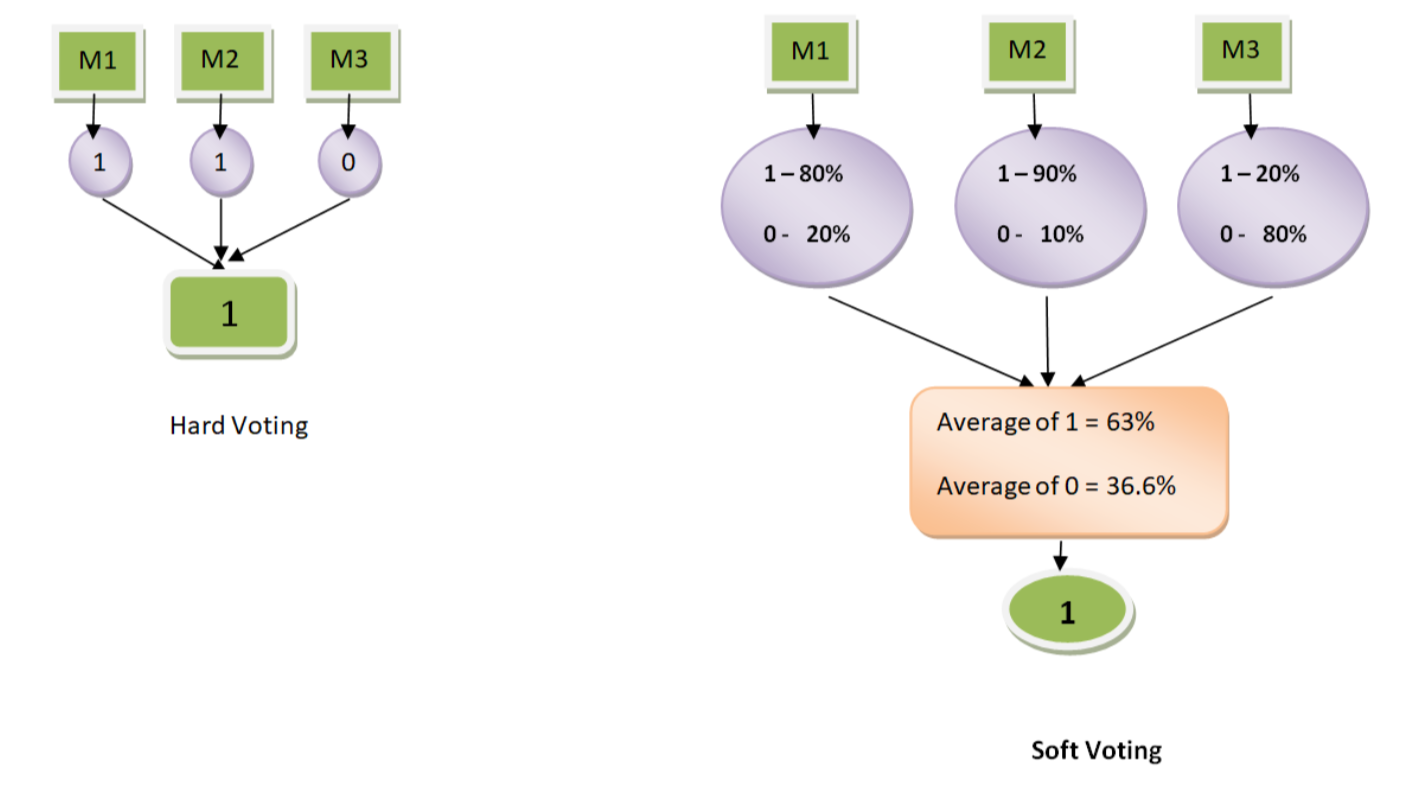

## Explain about method's parameters<b>

**estimators**- List of tuples. Invoking the fit method on the VotingClassifier will fit clones of those original estimators that will be stored in the class attribute self.estimators_.<br>
**voting**- Can be 'hard' or 'soft'. As I already explain before- If ‘hard’, uses predicted class labels for majority rule voting. Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.  <br>


## Importing additional libraries

In [88]:
from sklearn.ensemble import VotingClassifier
import warnings


## Fit & Predict


In [89]:
#Start measuring running time
StartTimeVoting = time.time()

# instantiate the model
Voting = VotingClassifier(estimators=[('lr', log_reg), ('rf', RForest), ('ab',ada_clf),('xb',XGBoost),('knn', knn)],voting='soft')

# fit the model with data
Voting.fit(first_train, check_train)

#make predictions on the testing set (predict for first_test)
Voting_Pred = Voting.predict(first_test)

#Finish measuring running time
EndTimeVoting = time.time()

#Toal running time
TotalTimeVoting = EndTimeVoting - StartTimeVoting

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeVoting)
ModelName.append('Voting')

**Accuracy,Classification Error (Misclassification Rate) :**

In [90]:
accuracyVoting = metrics.accuracy_score(check_test, Voting_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyVoting)
print("the Classification Error for this model is:", 1 - accuracyVoting)

The Accuracy of this model is: 1.0
the Classification Error for this model is: 0.0


## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the Voting classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [91]:
CM_VOT=confusion_matrix(check_test,Voting_Pred)
CM_VOT#It's a 2x2 matrix because there are 2 response classes (0,1)

array([[ 26903,      0,      0],
       [     0, 148957,      0],
       [     0,      0,  25032]], dtype=int64)

Lets show Confusion Matrix as heat map:

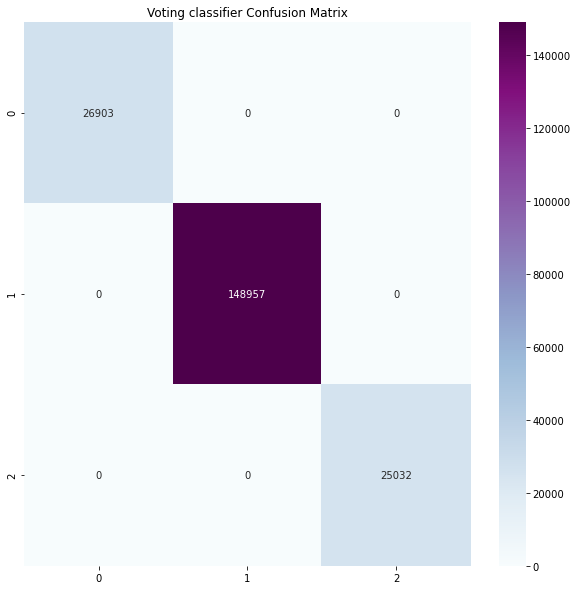

In [92]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_VOT,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Voting classifier Confusion Matrix')
plt.show()

### Classification Report

Let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method:

In [93]:
print (classification_report(check_test,Voting_Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26903
           1       1.00      1.00      1.00    148957
           2       1.00      1.00      1.00     25032

    accuracy                           1.00    200892
   macro avg       1.00      1.00      1.00    200892
weighted avg       1.00      1.00      1.00    200892



**Conclusion**<br>
Same as models above.

# <b> Bagging  <b>
    
Bagging stands for bootstrap aggregation. One way to reduce the variance of an estimate is to average together multiple estimates. For aggregating the outputs of base learners in case of classification, bagging uses Voting (and averaging in case of regression).<br>
For example, random forest trains X Decision Tree, It is possible to train X different trees on different random subsets of the data and perform voting for final prediction.<br>
Bagging ensembles methods are Random Forest and Extra Trees.<br>
    
In other words, Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset,<br> and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.
    
Bagging is composed of two parts: aggregation and bootstrapping.<br>
Bootstrapping is a sampling method, where a sample is chosen out of a set, using the replacement method. <br>
The learning algorithm is then run on the samples selected.<br>

The bootstrapping technique uses sampling with replacements to make the selection procedure completely random. <br>
When a sample is selected without replacement, the subsequent selections of variables are always dependent on the previous selections, making the criteria non-random.    

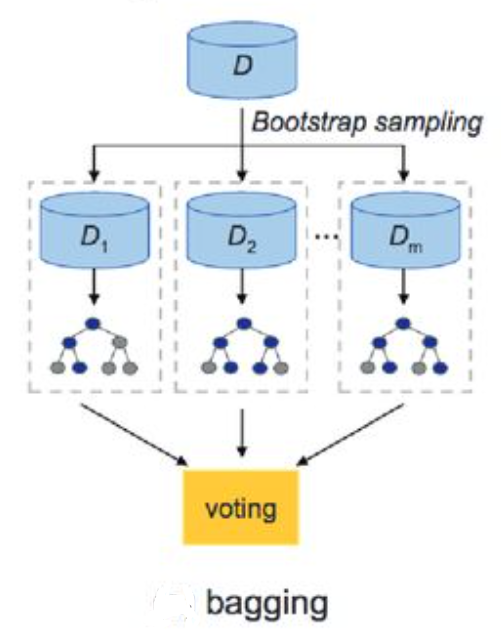

## Explain about method's parameters<b>

**n_estimators**- The number of base estimators in the ensemble <br>
**bootstrap**- Whether samples are drawn with replacement (as I explained above). If False, sampling without replacement is performed.   <br>


## Importing additional libraries

In [94]:
from sklearn.ensemble import BaggingClassifier

## Fit & Predict


In [95]:
#Start measuring running time
StartTimeBagging = time.time()

# instantiate the model
Bagging = BaggingClassifier(XGBoost, n_estimators = 100, bootstrap = True)

# fit the model with data
Bagging.fit(first_train, check_train)

# make predictions on the testing set (predict for first_test)
Bagging_Pred = Bagging.predict(first_test)

#Finish measuring running time
EndTimeBagging = time.time()

#Toal running time
TotalTimeBagging = EndTimeBagging - StartTimeBagging

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeBagging)
ModelName.append('Bagging')


**Accuracy,Classification Error (Misclassification Rate) :**

In [96]:
accuracyBagging = metrics.accuracy_score(check_test, Bagging_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyBagging)
print("the Classification Error for this model is:", 1 - accuracyBagging)

The Accuracy of this model is: 1.0
the Classification Error for this model is: 0.0


## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the Bagging classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [97]:
CM_BAG=confusion_matrix(check_test,Bagging_Pred)
CM_BAG#It's a 3x3 matrix because there are 3 response classes (0,1,2)

array([[ 26903,      0,      0],
       [     0, 148957,      0],
       [     0,      0,  25032]], dtype=int64)

Lets show Confusion Matrix as heat map:

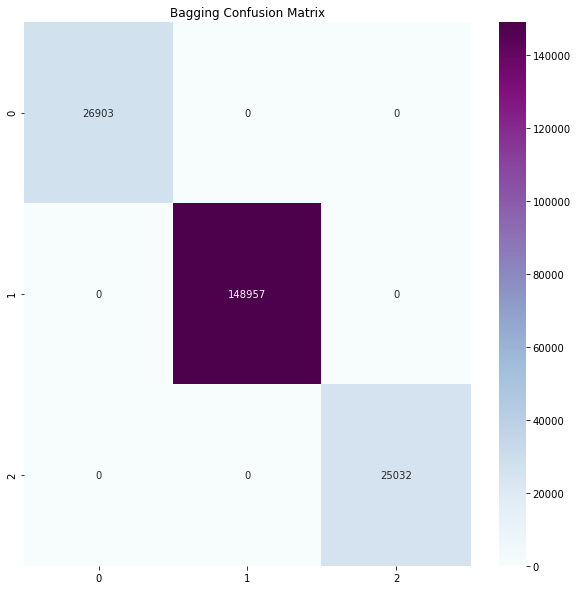

In [98]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_BAG,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Bagging Confusion Matrix')
plt.show()

### Classification Report

Let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method:

In [99]:
print (classification_report(check_test,Bagging_Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26903
           1       1.00      1.00      1.00    148957
           2       1.00      1.00      1.00     25032

    accuracy                           1.00    200892
   macro avg       1.00      1.00      1.00    200892
weighted avg       1.00      1.00      1.00    200892



**Conclusion**<br>
Same as models above.

# <b> Stacking  <b>

Instead of using trivial functions (such as hard voting) to combine the predictions of all classifiers in an ensemble,<br>
in Stacking we are training a model to perform this combination.<br>
Actually we can say we have Stack of estimators with a final classifier (The final classifier to "classify the classifiers" is chosen to be Logistic Regression).<br>

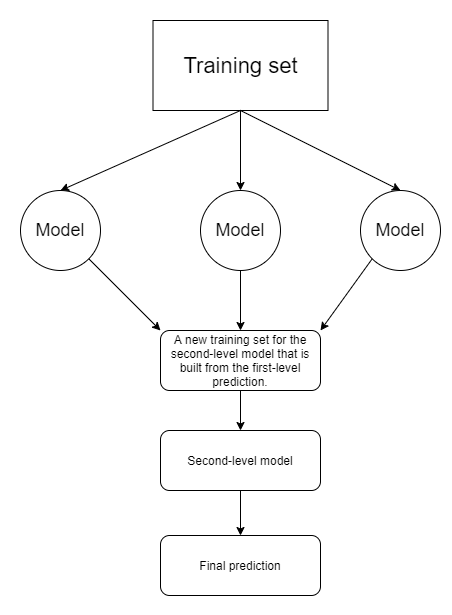

## Explain about method's parameters<b>

**estimators**- List of tuples. Invoking the fit method on the VotingClassifier will fit clones of those original estimators that will be stored in the class attribute self.estimators_.<br>


## Importing additional libraries

In [100]:
from sklearn.ensemble import StackingClassifier


## Fit & Predict


In [101]:
#Start measuring running time
StartTimeStacking = time.time()

# instantiate the model
Stacking = StackingClassifier(estimators= [('knn', knn),('lr', log_reg),('rf', RForest),('ab',ada_clf),('xb',XGBoost)])

# fit the model with data
Stacking.fit(first_train, check_train)

# make predictions on the testing set (predict for first_test)
Stacking_Pred = Stacking.predict(first_test)

#Finish measuring running time
EndTimeStacking = time.time()

#Toal running time
TotalTimeStacking = EndTimeStacking - StartTimeStacking

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeStacking)
ModelName.append('Stacking')


**Accuracy,Classification Error (Misclassification Rate) :**

In [102]:
accuracyStacking = metrics.accuracy_score(check_test, Stacking_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyStacking)
print("the Classification Error for this model is:", 1 - accuracyStacking)

The Accuracy of this model is: 1.0
the Classification Error for this model is: 0.0


## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the Stacking classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [103]:
CM_ST=confusion_matrix(check_test,Stacking_Pred)
CM_ST#It's a 3x3 matrix because there are 3 response classes (0,1,2)

array([[ 26903,      0,      0],
       [     0, 148957,      0],
       [     0,      0,  25032]], dtype=int64)

Lets show Confusion Matrix as heat map:

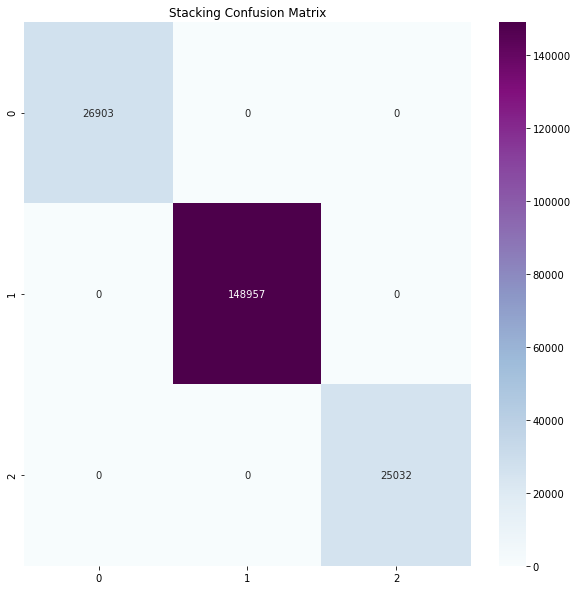

In [104]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_ST,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Stacking Confusion Matrix')
plt.show()

### Classification Report

Let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method:

In [105]:
print (classification_report(check_test,Stacking_Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26903
           1       1.00      1.00      1.00    148957
           2       1.00      1.00      1.00     25032

    accuracy                           1.00    200892
   macro avg       1.00      1.00      1.00    200892
weighted avg       1.00      1.00      1.00    200892



**conclusion**<br>
Same as models above.

# Subtotal Of All Models Accuracies&Run Time

In [106]:
#Create array of all accuracies:

Acuuracies=[accuracyRForest,accuracyAda,accuracyXG,accuracyVoting,accuracyBagging,accuracyStacking,LogAC,KnnAc,DumAc]
AcuuraciesNames=['RF', 'ADA', 'XG', 'Voting', 'Bagging', 'Stacking', 'logReg', 'knn' , 'Dummy' ]
RunningTimesNew=[53.937676668167114, 122.78866386413574, 122.56979441642761, 359.40255880355835, 2755.387443780899, 1470.2946169376373, 257.6838688850403, 0,0]

#define df
dataset = pd.DataFrame({'Model': AcuuraciesNames, 'Acuuracies': list(Acuuracies), 'Run Time':list(RunningTimesNew)}, columns=['Model', 'Acuuracies', 'Run Time'])
#turn 0 values to Nan , because those values did not measured (from last semester)
dataset['Run Time'] = dataset['Run Time'].replace({ 0:np.nan})

dataset

,Model,Acuuracies,Run Time
0,RF,1.000000,53.937677
1,ADA,1.000000,122.788664
2,XG,1.000000,122.569794
3,Voting,1.000000,359.402559
4,Bagging,1.000000,2755.387444
5,Stacking,1.000000,1470.294617
6,logReg,1.000000,257.683869
7,knn,0.999970,NaN
8,Dummy,0.741478,NaN


Now, after I trained all the models I will compare their ROC curves and ROC
AUC scores to those I got from the Logistic Regression,KNN and Dummy models.

## <b>ROC curves and AUC ROC </b><br>
### <b> AUC ROC<b>
#### the area under the ROC curve

In [107]:
#to get the auc roc roc curves we will use Scikit-Learn’s roc_curve, roc_auc_score functions:
from sklearn.metrics import roc_curve, roc_auc_score

#now because we use multiclass, we need to change the values of predictions -this must be probability estimates which sum to 1. 
Pred_log_prob=log_reg.predict_proba(first_test)
Pred_RForest_prob=RForest.predict_proba(first_test)
Pred_Ada_prob=ada_clf.predict_proba(first_test)
Pred_XG_prob=XGBoost.predict_proba(first_test)
Pred_Voting_prob=Voting.predict_proba(first_test)
Pred_Stacking_prob=Stacking.predict_proba(first_test)
Pred_Bagging_prob=Bagging.predict_proba(first_test)


auc_RForest=roc_auc_score(check_test,Pred_RForest_prob,multi_class="ovr")
auc_log=roc_auc_score(check_test,Pred_log_prob,multi_class="ovr")
auc_Ada=roc_auc_score(check_test,Pred_Ada_prob,multi_class="ovr")
auc_XG=roc_auc_score(check_test,Pred_XG_prob,multi_class="ovr")
auc_Voting=roc_auc_score(check_test,Pred_Voting_prob,multi_class="ovr")
auc_Stacking=roc_auc_score(check_test,Pred_Stacking_prob,multi_class="ovr")
auc_Bagging=roc_auc_score(check_test,Pred_Bagging_prob,multi_class="ovr")

#Last semester I trained and chose dummy Classifier (most_frequent dummy), and compute already his AUC ROC , therefore I will write it again:
print ("The AUC ROC of the Dummy model is:",auc_dum)
#Same for KNN and Logistic Regression model
print ("The AUC ROC of the knn model is:",auc_knn)
print ("The AUC ROC of the Logistic Regression model is:",auc_log)

print ("The AUC ROC of the  Random Forest Classifier model is:",auc_RForest)
print ("The AUC ROC of the AdaBoost model is:",auc_Ada)
print ("The AUC ROC of the XGBoost model is:",auc_XG)
print ("The AUC ROC of the Voting model is:",auc_Voting)
print ("The AUC ROC of the Stacking model is:",auc_Stacking)
print ("The AUC ROC of the Bagging model is:",auc_Bagging)


The AUC ROC of the Dummy model is: 0.5
The AUC ROC of the knn model is: 0.9999797690684297
The AUC ROC of the Logistic Regression model is: 1.0
The AUC ROC of the  Random Forest Classifier model is: 1.0
The AUC ROC of the AdaBoost model is: 1.0
The AUC ROC of the XGBoost model is: 1.0
The AUC ROC of the Voting model is: 1.0
The AUC ROC of the Stacking model is: 1.0
The AUC ROC of the Bagging model is: 1.0


**Conclusion**<br>
We can see that all areas values of all models are the same and equal to 1, means there is no FPR(False Positieve Rate).

In [108]:
#Let's add to our df new column of AUC ROC

AUC_val=[auc_RForest,auc_Ada,auc_XG,auc_Voting,auc_Bagging,auc_Stacking,auc_log,auc_knn,auc_dum]
dataset['AUC ROC']=AUC_val
dataset

,Model,Acuuracies,Run Time,AUC ROC
0,RF,1.000000,53.937677,1.00000
1,ADA,1.000000,122.788664,1.00000
2,XG,1.000000,122.569794,1.00000
3,Voting,1.000000,359.402559,1.00000
4,Bagging,1.000000,2755.387444,1.00000
5,Stacking,1.000000,1470.294617,1.00000
6,logReg,1.000000,257.683869,1.00000
7,knn,0.999970,NaN,0.99998
8,Dummy,0.741478,NaN,0.50000


### <b> ROC Curves<b>

I will show the ROC Curve for the Random Forest Classifier model, and because all the accuracies in all models are equal to 1,<br>
we can concluse that there is no False Psitive Rate- so all models will be displayed the same.<br>
Therefore there is no need to show the ROC Curves for all models, and I will show it for one model to get an intuation.

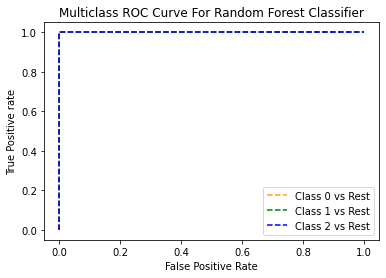

In [109]:
#I will show the ROC curves for Random Forest Classifier

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 3
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(check_test, Pred_RForest_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC Curve For Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()


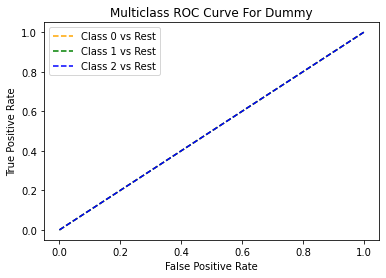

In [110]:
#for Dummy
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 3
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(check_test, Pred_dum_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC Curve For Dummy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

# <b> Finding The Best RunTime   <b>

Because the accuracy is the same and equal to 1 for all models,I will find the best model by finding the best run time.
I will use both array that I initialize above to find the Max&Min run time of all models: 

In [111]:
#First, let's add the Logistic Regression model from last semester
RunningTimes.append(TotalTimeLR)
ModelName.append('logReg')

print (RunningTimes)
print (ModelName)

[50.593770265579224, 46.917375564575195, 20.359002828598022, 340.9332573413849, 2141.6165175437927, 1378.9846785068512, 41.49223494529724]
['RF', 'ADA', 'XG', 'Voting', 'Bagging', 'Stacking', 'logReg']


In [112]:
#find the max&min values from RunningTimes array
max_RunTime = np.max(RunningTimes)
min_RunTime = np.min(RunningTimes)

#find the index of max&min values
index_maxRunTime=RunningTimes.index(max_RunTime)
index_minRunTime=RunningTimes.index(min_RunTime)

print("The model with the highest runtime is",ModelName[index_maxRunTime], "with running time of:",max_RunTime  )
print("The model with the lowest runtime is",ModelName[index_minRunTime], "with running time of:",min_RunTime  )

The model with the highest runtime is Bagging with running time of: 2141.6165175437927
The model with the lowest runtime is XG with running time of: 20.359002828598022


## <b>RunTime Visualization </b>

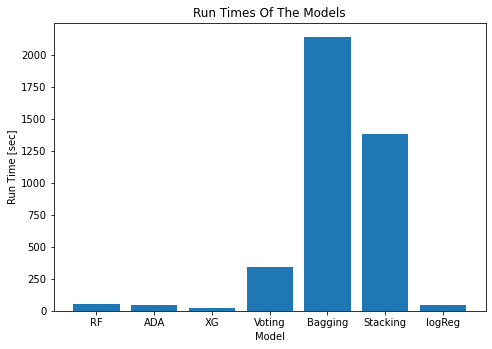

In [113]:
figure=plt.figure()

axes=figure.add_axes([0,0,1,1]) 
axes.bar(ModelName,RunningTimes)
plt.title('Run Times Of The Models')
plt.xlabel('Model')
plt.ylabel('Run Time [sec]')
plt.show()

**Conclousin**<br>
As I wrote two cells above-The model with the highest runtime is Bagging,<br>
The model with the lowest runtime is Random Forest.

## <b>Accuracy&Run Time Visualization </b>
I will take the three leads models and plot them.

In [114]:
#Let's see again the accuracies we got

print(Acuuracies)
print(AcuuraciesNames)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999701332059017, 0.7414780080839456]
['RF', 'ADA', 'XG', 'Voting', 'Bagging', 'Stacking', 'logReg', 'knn', 'Dummy']


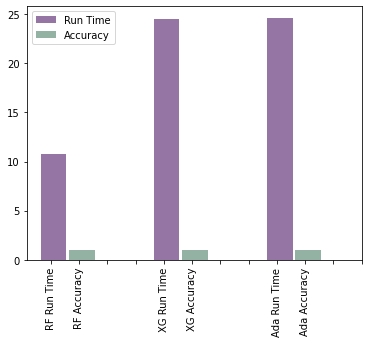

In [115]:
# Create bars
barWidth = 0.9 #Width of each bar
bars1 = [53.937676668167114/5, 122.56979441642761/5, 122.78866386413574/5] # X values of purple bars, represent the running time.divided by 5 to save the relations in the graph
bars2 = [1, 1, 1] #Y values of green bars, represent the accuracies
 
# The X position of bars
r1 = [1,5,9]
r2 = [2,6,10]
 
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Run Time')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.4,0.6), label='Accuracy')
# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth for r in range(12)], ['RF Run Time', 'RF Accuracy', ' ', ' ', 'XG Run Time', 'XG Accuracy', ' ', ' ', 'Ada Run Time', 'Ada Accuracy', ' ', ' '], rotation=90)

# Adjust the margins
plt.subplots_adjust(bottom= 0.1, top = 0.98)

# Show graphic
plt.show()

**Conclusion**<br>
As we can see (and as I already compute), the Random Forest model is the model with the best runtime.<br>
Furtheremore, after I copmute both the accuracy and the runtime for each model, because the accuracy of each model is 1,<br>
I can say that the best model is Random Forest.<br>

# Try to improve Random Forest model

After I found Random Forest is the best model both acuuracy and running time, I would like to try improve this model.<br>
(I know the accuracy is 1, but I still want to show my line of thought, and the full process if the situation was different from accuracy of 100%)
I will try to do so by doing the following steps:<br>
1. Scaling <br>
2. PCA<br>
3. Grid Search<br>
4. Another run of the XGBoost model after chosen values from the Grid Search<br>
5. Confusion Matrix&Classification report for the 'improved model'

(A detailed explanation appears for each level)

# <b>Dimensionality Reduction </b>

# PCA -Principal Component Analysis

PCA is the most popular dimensionality reduction algorithm.<br>
First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.<br>

At first I did PCA, but the results were different than I expected — and I got a higher run time (at least 3 times higher!)
After many discussions with my student friends, and reading query that student (Daniel Appeal) from our class ask in stackexchange website (link:https://datascience.stackexchange.com/questions/99577/why-does-classifier-xgboost-after-pca-runtime-increase-compared-to-before-p)- It can be infered that PCA algorithem working good when there are a lot of features,<br>
and not so well on data with few features.<br>
In addition, if the features (all of them or most of them) have limited amount of descrete values, then PCA will not work well.<br>
This is exactly the case with my dataset- I have 6 features, all are discrete values, in range 0-220 (as I found at the first part of the notebook, that I did last semester).<br>
Therefore PCA will not work well on my data, to show it, I will run PCA on XGBoost, that was the fastest model before the PCA:

## Importing additional libraries

In [116]:
from sklearn.decomposition import PCA
from sklearn import preprocessing #this package gives us functions for scaling the data before performing PCA


Before I will do the PCA, Iwant to see again the data: 

In [117]:
data.tail(10)

,strength,pass_len,Num_dig,Num_Space,Num_Slett,Num_Clett,Num_Oth
669630,1,9,3,0,6,0,0
669631,2,16,4,0,5,7,0
669632,1,9,1,0,8,0,0
669633,1,9,2,0,7,0,0
669634,0,6,1,0,5,0,0
669635,1,10,4,0,6,0,0
669636,1,9,1,0,8,0,0
669637,1,12,6,0,6,0,0
669638,1,9,2,0,7,0,0
669639,1,8,2,0,6,0,0


In [118]:
print("Data has",len(data.columns)-1,"features." ) #-1 because the strength is the label 

Data has 6 features.


First thing I want to do is Min-Max scaling.<br>
The main reason for doing this, is that as it is possible to see the difference between the values of all coulumns will be very high, for example:


In [119]:
#lets find max lenghts of the passwords
data["pass_len"].max()

#Check the index of the row with the maximun length value
data['pass_len'].argmax()

#lets see how the values in this row look like
print(data.loc[[26964]])

       strength  pass_len  Num_dig  Num_Space  Num_Slett  Num_Clett  Num_Oth
26964         2       220       31          0        109         80        0


## 1. Scaling

As I wrote before, the difference between the values of all columns will be very high, and if I will try to creat a new vector space, the difference between those values should be very minimal. <br>
So for this purpose I am going to use a **Min-Max scaling**.<br>

Min-max scaling (normalization) is way to get all attributes to have the same scale values, by the way they are shifted and rescaled so that they end up ranging from 0 to 1.<br>
We do this by subtracting the min value and dividing by the max minus the min.<br>
Scikit-Learn provides a transformer called MinMaxScaler for this.<br>
It has a feature_range hyperparameter that let change the range if, for some reason, you don’t want 0–1.<br>

The main reason for doing Min-Max scaling, is that as it is possible to see the difference between the values of all coulumns will be very high (as I show above).<br>

In [120]:
from sklearn.preprocessing import MinMaxScaler


In [121]:
#We will scale the first_train set
scaler = MinMaxScaler()
scaler.fit(first_train)#this is the train part from the secondary split

scaled_data=scaler.transform(first_train)# We get array 
first_train_scaled= pd.DataFrame(scaled_data)#turn into df
first_train_scaled

,0,1,2,3,4,5
0,0.031414,0.025641,0.0,0.036585,0.000000,0.0
1,0.041885,0.076923,0.0,0.036585,0.000000,0.0
2,0.036649,0.025641,0.0,0.042683,0.000000,0.0
3,0.026178,0.102564,0.0,0.012195,0.000000,0.0
4,0.057592,0.076923,0.0,0.054878,0.000000,0.0
...,...,...,...,...,...,...
468742,0.073298,0.153846,0.0,0.024390,0.064935,0.0
468743,0.036649,0.025641,0.0,0.042683,0.000000,0.0
468744,0.047120,0.076923,0.0,0.042683,0.000000,0.0
468745,0.026178,0.076923,0.0,0.018293,0.000000,0.0


In [122]:
#We will scale the first_test set
scaled_data_test=scaler.transform(first_test)# We get array 
first_test_scaled= pd.DataFrame(scaled_data_test)#turn into df
first_test_scaled

,0,1,2,3,4,5
0,0.041885,0.025641,0.0,0.048780,0.000000,0.000000
1,0.041885,0.051282,0.0,0.042683,0.000000,0.000000
2,0.078534,0.025641,0.0,0.036585,0.116883,0.000000
3,0.047120,0.076923,0.0,0.042683,0.000000,0.000000
4,0.047120,0.076923,0.0,0.042683,0.000000,0.000000
...,...,...,...,...,...,...
200887,0.031414,0.051282,0.0,0.030488,0.000000,0.000000
200888,0.036649,0.102564,0.0,0.024390,0.000000,0.000000
200889,0.041885,0.025641,0.0,0.048780,0.000000,0.000000
200890,0.031414,0.051282,0.0,0.030488,0.000000,0.000000


We can see the data has been converted into new dataframe , and this is based on the standard deviation as 1, and mean is equal to 0. <br>
Now we will apply the PCA.<br>

# 2. Back to PCA

In [123]:
from sklearn.decomposition import PCA
from sklearn import preprocessing #this package gives us functions for scaling the data before performing PCA


In [124]:
print("Data has",len(first_train_scaled.columns),"features." ) 

Data has 6 features.


In [125]:
#From the total dimensions, I want to set n_components to be a float between 0.0 and 1.0, 
#indicating the ratio of variance I wish to preserve, in this case I will choose 0.95:
 
pca = PCA(n_components = 0.95)

#fit the scaled data
X_train_Reduced=pca.fit_transform(first_train_scaled)

#transform the PCA by using the PCA object for the scaled data
X_test_Reduced=pca.transform(first_test_scaled)


In [126]:
#We get an array
X_train_Reduced
#So we will turn it into df
X_train_Reduced = pd.DataFrame(X_train_Reduced)
#and check the shape of it to see how it change
X_train_Reduced.shape

(468747, 4)

It is possible to see the difference by the number of columns- 6 columns to first_train_scaled, and different number after the PCA.

**Conclusion**<br>
After the PCA , dimensions dropped from 6 to 4. Means:

In [127]:
print ("Dimensions decreased by",  100-((4*100)/6),"%")

Dimensions decreased by 33.33333333333333 %


## 3. Grid Search<br>

By using Grid search, I will find the values that will give me the best results for this model by check every value of Hyperparameter , with every value of another Hyperparameter  from the arrays I wrote below .<br>
Unfortunately,  as you can see, I ran the function and after 4 days the command still did not finish running, so I stopped it.<br>
Anyway, I will continue to explain the process I wanted do show, and what I expected to see.


In [128]:
from sklearn.model_selection import GridSearchCV

def GridSearchRF():
    
    paramsRF = {
         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [200,500,800,1100,1400,1700,2000,2300,2600,2900]
    }
    gridSearch = GridSearchCV(RForest, paramsRF, cv=10, scoring='accuracy')


    start_timeGS = time.time()
    gridSearch.fit(X_train_Reduced, check_train)
    timeGS = time.time() - start_timeGS
    print("Time taken to achive result: %s seconds" % (timeGS))
    pd.DataFrame(gridSearch.cv_results_)[['Average score', 'std_test_score', 'params']]
    
    #The results after the run of the function:
    print("Best Average Accuracy:",gridSearch.best_score_, "when the parameters were:", gridSearch.best_params_)

In [129]:
#GridSearchRF()

## 4.+5. Short Explain

After I found the optimal values for the model, I will show again the Confusion Matrix and Classification Report ,<br>
and compare also the run time and accuracy I got from the 'improved' model and from the initial model.

# Try Random Forest with scaling data

In [130]:
#Start measuring running time
StartTimeRFScaling = time.time()

# instantiate the model
RForestScaling= RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=0)

# fit the model with data
RForestScaling.fit(first_train_scaled, check_train)

#make predictions on the testing set (predict for first_test_scaled)
RForestPredScaling = RForestScaling.predict(first_test_scaled)

#Finish measuring running time
EndTimeRFScaling = time.time()

#Toal running time
TotalTimeRFScaling= EndTimeRFScaling - StartTimeRFScaling 

print("Running time of Random Forest after Scaling is:",TotalTimeRFScaling)
accuracyRFScaling = metrics.accuracy_score(check_test, RForestPredScaling)#check the predictions with the real values

print("The Accuracy of Random Forest after Scaling is:",accuracyRFScaling)

Running time of Random Forest after Scaling is: 49.91766977310181
The Accuracy of Random Forest after Scaling is: 1.0


# Try Random Forest after PCA

Althoght I already explain above about the reason PCA will not work well on my data, I would like to show the results by using PCA.

In [131]:
#Start measuring running time
StartTimeRFPCA = time.time()

# instantiate the model
RForestPCA= RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=0)

# fit the model with data
RForestPCA.fit(X_train_Reduced, check_train)

#make predictions on the testing set (predict for first_test)
RForestPredPCA = RForestPCA.predict(X_test_Reduced)

#Finish measuring running time
EndTimeRFPCA = time.time()

#Toal running time
TotalTimeRFPCA= EndTimeRFPCA - StartTimeRFPCA

print("Running time of Random Forest after PCA is:",TotalTimeRFPCA)
accuracyRFPCA = metrics.accuracy_score(check_test, RForestPredPCA)#check the predictions with the real values

print("The Accuracy of Random Forest after PCA is:",accuracyRFPCA)

Running time of Random Forest after PCA is: 92.38938117027283
The Accuracy of Random Forest after PCA is: 0.9999452442108198


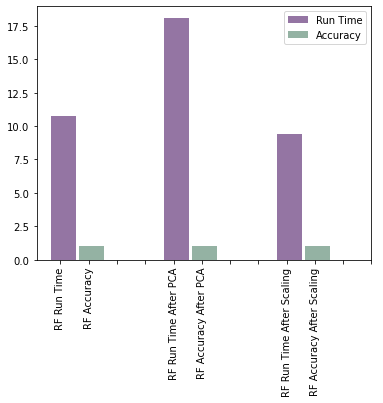

In [132]:
# Create bars
barWidth = 0.9 #Width of each bar
bars1 = [53.937676668167114/5, 90.33577585220337/5, 46.94249153137207/5] # X values of purple bars, represent the running time.divided by 5 to save the relations in the graph
bars2 = [1, 0.9999452442108198, 1] #Y values of green bars, represent the accuracies
 
# The X position of bars
r1 = [1,5,9]
r2 = [2,6,10]
 
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Run Time')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.4,0.6), label='Accuracy')
# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth for r in range(12)], ['RF Run Time', 'RF Accuracy', ' ', ' ', 'RF Run Time After PCA', 'RF Accuracy After PCA', ' ', ' ', 'RF Run Time After Scaling', 'RF Accuracy After Scaling', ' ', ' '], rotation=90)

# Adjust the margins
plt.subplots_adjust(bottom= 0.1, top = 0.98)

# Show graphic
plt.show()

# Conclusion

From the data I have presented during the notebook,It is possible to see the process for finding the best model,
during considering both run time and accuracy.

Unfortunately, as I already explain, due low computer performence of my computer the Grid Search algorithem ran for 4 days and more,<br>
so I can not show the difference of the best model (in this case It is the Random Forest mode) , by using different hyperparameters.<br>

If It was working,and the best accuracy was obtained of bigger number of n_estimators, I expected to see longer runtime of the model-means the more trees there are, the longer run time.<br>
Same about min_samples_split -the more we increase the minimum number of samples required to split a node, We will get the longer run time. <br>

it can be concluded from the last graph that we get the best result by using random forest after scaling-<br>
means, after scaling we get both the fastest model and the most accurate model. 